In [1]:
# This two lines of code make your notebook aware of changes in
# your utils.py file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [2]:
import analyse_data as a
import filter_by_tuning
import utils as u

## Analyse the guitar pro files

In [3]:
folder_path = "Open D/Rock"  # Replace with your folder path
output_json = "guitar_analysis.json"
a.process_folder(folder_path, output_json)

Processing file: Open D/Rock/Pearl Jam - Even Flow.gp3
Processing file: Open D/Rock/The Stone Roses - Love Spreads.gp4
Processing file: Open D/Rock/Stone Temple Pilots - Interstate Love Song.gp5
Processing file: Open D/Rock/Sungha Jung - I Wont Give Up.gp5
Processing file: Open D/Rock/Boys Like Girls - Thunder.gp5
Analysis saved to guitar_analysis.json


In [4]:
filtered_data_open_D = filter_by_tuning.load_analysis_file_by_tuning(output_json, "Open D")

print("Filtered Guitars:")
for guitar in filtered_data_open_D:
  print(f"Title: {guitar['title']}, Artist: {guitar['artist']}, Track: {guitar['track_name']}")
  print(f"Tuning: {guitar['tuning']} ({guitar['tuning_label']})")
  print(f"String-Fret Frequency: {guitar['string_fret_frequency']}")
  print("-" * 50)

Filtered Guitars:
Title: Even Flow, Artist: Pearl Jam, Track: Guitar 1
Tuning: [62, 57, 54, 50, 45, 38] (Open D)
String-Fret Frequency: {'1': {}, '2': {}, '3': {'0': 4, '12': 77, '10': 40, '8': 11}, '4': {'0': 97, '12': 161, '10': 72, '8': 44, '14': 1}, '5': {'3': 95, '0': 174, '5': 73, '12': 162, '8': 55, '10': 38, '14': 3}, '6': {'16': 1, '7': 60, '0': 261, '6': 10, '5': 14, '3': 14, '12': 136, '8': 55, '10': 114, '11': 13}}
--------------------------------------------------
Title: Love Spreads, Artist: , Track: Lead Guitar
Tuning: [62, 57, 54, 50, 45, 38] (Open D)
String-Fret Frequency: {'1': {'0': 15, '7': 3, '5': 2, '12': 3}, '2': {'0': 14, '7': 3, '5': 2, '12': 3}, '3': {'0': 26, '2': 13, '5': 8, '12': 3}, '4': {'0': 234, '3': 214, '5': 196, '7': 3, '2': 4, '4': 1}, '5': {'0': 44, '3': 198, '5': 292}, '6': {'0': 75, '5': 14, '3': 9, '7': 2}}
--------------------------------------------------
Title: Interstate Love Song , Artist: , Track: Guitar 1 (slide)
Tuning: [62, 57, 54, 50, 

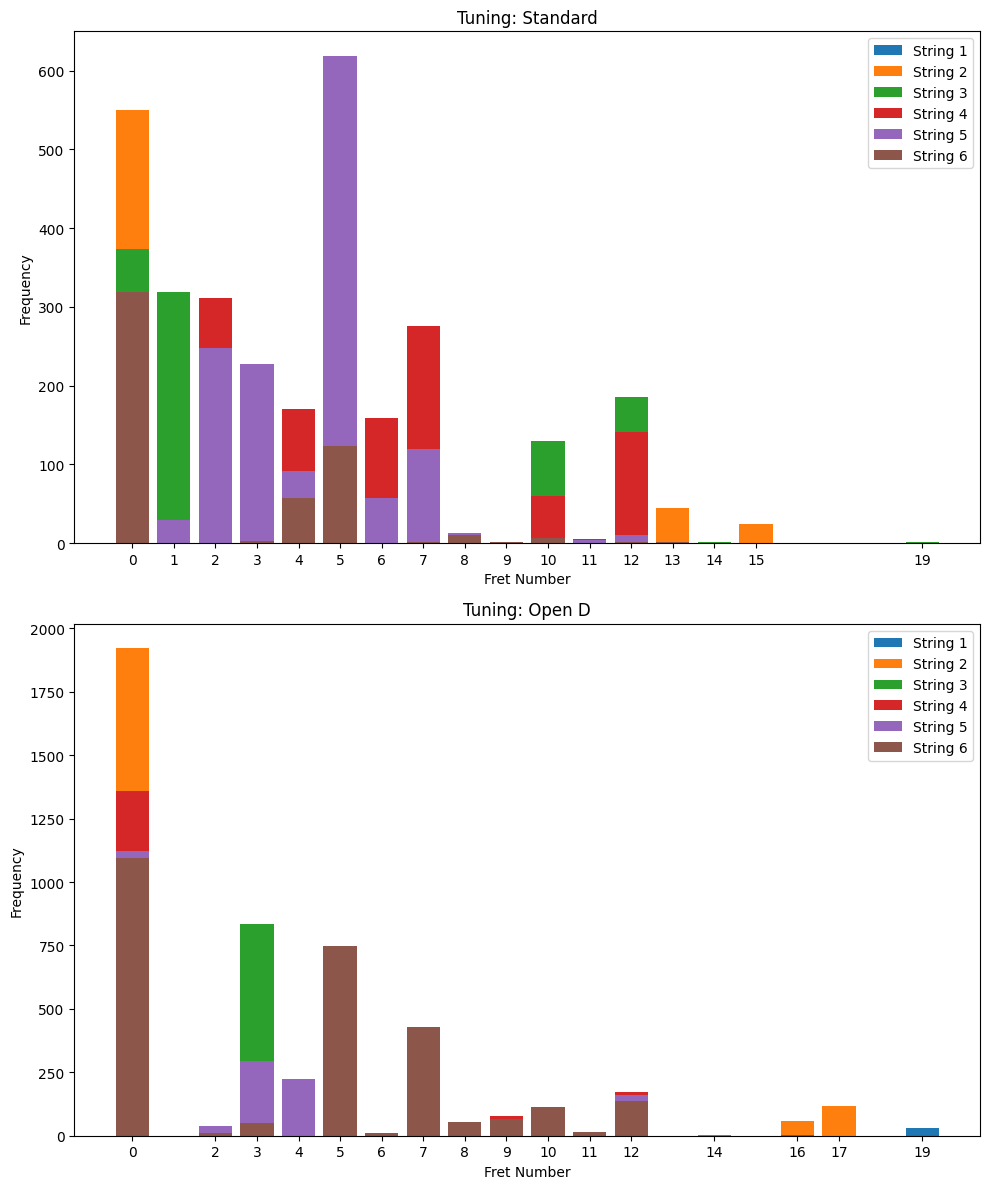

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def aggregate_string_fret_frequency(data):
    """Aggregate string-fret frequency for a list of tracks."""
    aggregated = {}
    for track in data:
        for string, frets in track.get("string_fret_frequency", {}).items():
            if string not in aggregated:
                aggregated[string] = {}
            for fret, count in frets.items():
                aggregated[string][int(fret)] = aggregated[string].get(int(fret), 0) + count  # Ensure fret is an integer
    return aggregated

def plot_tuning_comparison(data, tuning_labels):
    """Plot a comparison of string-fret frequencies for multiple tunings."""
    aggregated_data = {}
    
    # Aggregate data for each tuning
    for tuning_label in tuning_labels:
        filtered_data = filter_by_tuning.filter_guitars_by_tuning_label(data, tuning_label)
        aggregated_data[tuning_label] = aggregate_string_fret_frequency(filtered_data)
    
    # Plot the data
    fig, axes = plt.subplots(len(tuning_labels), 1, figsize=(10, 6 * len(tuning_labels)))
    if len(tuning_labels) == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot
    
    for ax, tuning_label in zip(axes, tuning_labels):
        aggregated = aggregated_data[tuning_label]
        all_fret_numbers = set()  # Collect all fret numbers for consistent x-axis ticks
        for string, frets in aggregated.items():
            # Sort fret numbers and corresponding counts
            sorted_frets = sorted(frets.items())  # Sort by fret number (as integers)
            fret_numbers, fret_counts = zip(*sorted_frets)  # Unzip into two lists
            
            all_fret_numbers.update(fret_numbers)  # Add fret numbers to the set
            ax.bar(fret_numbers, fret_counts, label=f"String {string}")
        
        # Set x-axis ticks to show all fret numbers
        ax.set_xticks(sorted(all_fret_numbers))  # Ensure ticks are integers and sorted
        ax.set_title(f"Tuning: {tuning_label}")
        ax.set_xlabel("Fret Number")
        ax.set_ylabel("Frequency")
        ax.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    # Path to the guitar analysis JSON file
    filepath = "guitar_analysis.json"
    
    # Load the data
    data = u.load_guitar_analysis(filepath)
    
    # Specify the tunings to compare
    tunings_to_compare = ["Standard", "Open D"]
    
    # Plot the comparison
    plot_tuning_comparison(data, tunings_to_compare)

main()